In [1]:
# THIS EXAMPLE LOADS THE LOOKUP TABLE AND PLOTS SOME RESULTS
%matplotlib inline 
from pylab import *
import numpy as np

# read inputs
inputs = eval(open("../inputs.txt").read())

# load npz file (NOTE: this is a large file)
print 'Loading Lookup Table'
f = np.load(inputs['Lookup_Table'])
print 'Finished Loading'


Loading Lookup Table
Finished Loading


In [2]:
# print keys and read data into arrays
# Manipulation with numpy arrays is a lot faster than trying to read from the npz file every time
print f.keys()
input_Z = f['input_Z']
input_A = f['input_A']
input_log10_E = f['input_log10_E']
input_log10_z = f['input_log10_z']

observed_log10_E = f['observed_log10_E']
observed_A = f['observed_A']

LUT = f['LUT']

['input_log10_E', 'LUT', 'input_A', 'observed_A', 'observed_log10_E', 'input_Z', 'input_log10_z']


In [3]:
# the LUT shape corresponds to the following order
# input_Z (or input_A)
# input_log10_E
# input_log10_z
# observed_A
# observed_log10_E

print 'input_Z.shape\t\t', input_Z.shape
print 'input_log10_E.shape\t', input_log10_E.shape
print 'input_log10_z.shape\t', input_log10_z.shape

print 'observed_log10_E.shape\t', observed_log10_E.shape
print 'observed_A.shape\t',observed_A.shape
print ''
print 'LUT.shape\t\t', LUT.shape

input_Z.shape		(5,)
input_log10_E.shape	(82,)
input_log10_z.shape	(51,)
observed_log10_E.shape	(100,)
observed_A.shape	(57,)

LUT.shape		(5, 82, 51, 57, 100)


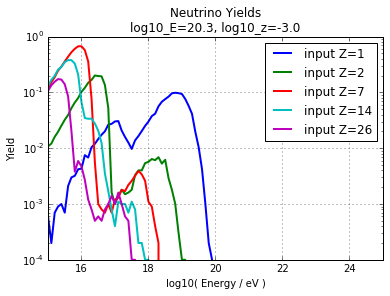

In [4]:
# make some pretty plots
input_Z_index = 3
input_log10_E_index = 33
input_log10_z_index = 10
observed_A_index = 0 # 0 is for neutrinos
ax = subplot(111)
ax.set_yscale('log')
for input_Z_index in range(0,len(input_Z)):
    plot(observed_log10_E, LUT[input_Z_index, input_log10_E_index,input_log10_z_index,observed_A_index,:], label='input Z=%d'%input_Z[input_Z_index], lw=2)
xlim(15., 25.)
legend(loc=1)
title('Neutrino Yields\nlog10_E=%1.1f, log10_z=%1.1f'%(input_log10_E[input_log10_E_index],input_log10_z[input_log10_z_index]))
xlabel('log10( Energy / eV )')
grid(True)
ylabel('Yield')